#Introduction to Value at Risk (VaR)

* We have several ways to evaluate risk for an individual stock or a
portfolio, such as variance, standard deviation of returns to measure the total risk,
or beta to measure the market risk of a portfolio or individual stocks.
* However, many CEOs prefer a simple measure called Value at Risk (VaR), which has
the simple definition given here:

***The maximum loss with a confidence level over a predetermined period***


There are two methods to estimate a VaR.

1.  The first method is based on
the assumption that our security or portfolio returns follow a normal distribution,
2.  The second method depends on the ranking of the historical returns.





## A normal distribution

The density of a normal distribution is defined here

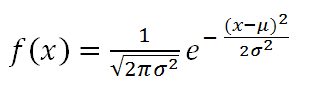

$f(x)$ is the density function, $x$ is an input variable, $μ$ is the mean and $σ$ is the standard deviation.

One function called *spicy.stats.norm.pdf()* could be used to estimate the density. The function has three input values: $x$, $μ$, and $σ$.

Details is at https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html



In [ ]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# x = 0, mean = 0.1, std = 0.05
d1= stats.norm.pdf(0,0.1,0.05) #f(x=0) where f() is a normal distribution with mean = 0.1 and std = 0.05
print("d1 (from the pdf() function)=",d1)
d2=1/np.sqrt(2*np.pi*0.05**2)*np.exp(-(0-0.1)**2/0.05**2/2) # verify manually
print("d2 (from manual calculation)=",d2)

d1 (from the pdf() function)= 1.079819330263761
d2 (from manual calculation)= 1.079819330263761


**A standard normal distribution**

* Setting μ=0, and σ=1, the preceding general normal distribution
density function collapses to a standard normal distribution; see its corresponding
density function:

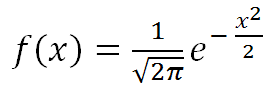

* The default values for the second and third input values for the spicy.stats.norm.
pdf() function are zero and 1, respectively.
* In other words, with just one input
value, it represents a standard normal distribution; see the following code and how
to manually verify it:


In [ ]:
d1=stats.norm.pdf(0) # f(x=0) where f() is a standard normal distribution
print("d1 (from the pdf() function) =",d1)
d2=1/np.sqrt(2*np.pi) # verify manually
print("d2 (from manual calculation) =",d2)

d1 (from the pdf() function) = 0.3989422804014327
d2 (from manual calculation) = 0.3989422804014327


The following code generates a graph for a standard normal distribution where the
spicy.stats.norm.pdf() function takes just one input:

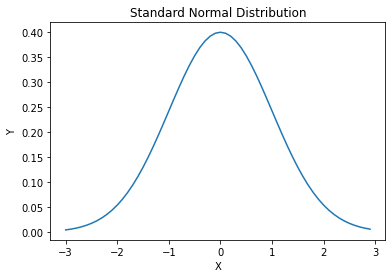

In [ ]:
x = np.arange(-3,3,0.1) ## generate random values for the x variable
y= stats.norm.pdf(x) ## get y values
plt.title("Standard Normal Distribution")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x,y)
plt.show()

## VaR Estimation

The following graph illustrates the concept of VaR based on a
standard normal distribution with a 95% confidence level:

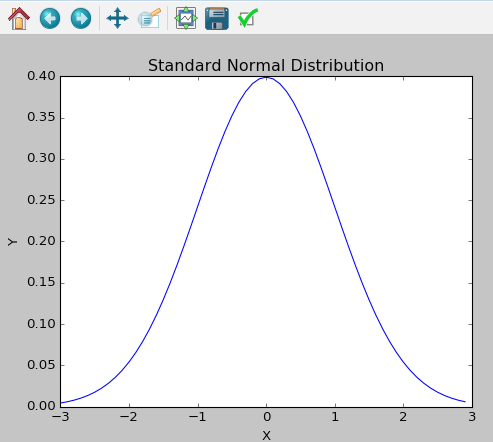

Based on the assumption of normality, we have the following general form to
estimate VaR:

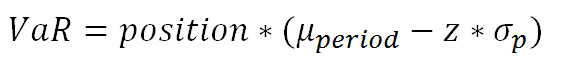


Here,
* $VaR$ is our value at risk
* $position$ is the current market value of our portfolio,
* $μ_{period}$ is the expected period return
* $z$ is a cut-off point depending on the confidence level
* $σ$ is the volatility of our portfolio

We could use
scipy.stats.norm.ppf(), percent point function, to get the z value. The preceding equation could be rewritten as follows:

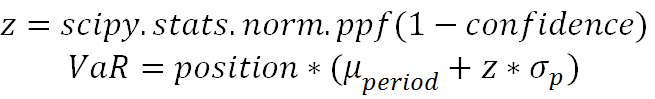

A careful reader should notice that the
signs in front of z are different. For the preceding equation, it has a positive sign
instead of the negative one shown in the previous equation. The reason is that the z
value estimated by applying *scipy.stats.norm.ppf()* would be negative.


In [ ]:
#Example of z value from scipy.stats.norm.ppf()
confidence_level=0.99
z= stats.norm.ppf(1-confidence_level)
print(z)

-2.3263478740408408


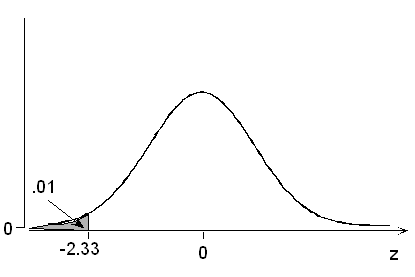

When the time period is short, such as 1 day, we could ignore the impact of $μ_{period}$.
Therefore, we have the following simplest form:

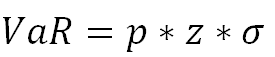



[-4.    -3.975 -3.95  -3.925 -3.9   -3.875 -3.85  -3.825 -3.8   -3.775
 -3.75  -3.725 -3.7   -3.675 -3.65  -3.625 -3.6   -3.575 -3.55  -3.525
 -3.5   -3.475 -3.45  -3.425 -3.4   -3.375 -3.35  -3.325 -3.3   -3.275
 -3.25  -3.225 -3.2   -3.175 -3.15  -3.125 -3.1   -3.075 -3.05  -3.025
 -3.    -2.975 -2.95  -2.925 -2.9   -2.875 -2.85  -2.825 -2.8   -2.775
 -2.75  -2.725 -2.7   -2.675 -2.65  -2.625 -2.6   -2.575 -2.55  -2.525
 -2.5   -2.475 -2.45  -2.425 -2.4   -2.375 -2.35  -2.325 -2.3   -2.275
 -2.25  -2.225 -2.2   -2.175 -2.15  -2.125 -2.1   -2.075 -2.05  -2.025
 -2.    -1.975 -1.95  -1.925 -1.9   -1.875 -1.85  -1.825 -1.8   -1.775
 -1.75  -1.725 -1.7   -1.675 -1.65 ] [0.00013383 0.00014786 0.00016326 0.00018014 0.00019866 0.00021893
 0.00024113 0.00026541 0.00029195 0.00032094 0.0003526  0.00038713
 0.00042478 0.0004658  0.00051046 0.00055906 0.0006119  0.00066932
 0.00073166 0.00079932 0.00087268 0.00095219 0.00103828 0.00113145
 0.00123222 0.00134112 0.00145873 0.00158567 0.00172257 

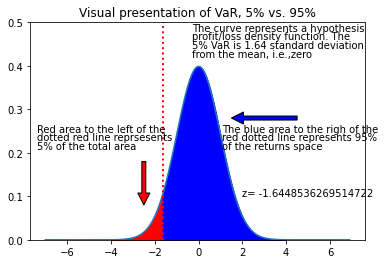

In [ ]:
confidence_level=0.95 # input
z=stats.norm.ppf(1-confidence_level)

plt.ylim(0,0.5)
x = np.arange(-7,7,0.1)
ret = stats.norm.pdf(x)
plt.plot(x,ret)
x2= np.arange(-4,z,1/40.) # x<z
#print('x2',x2)
x3=np.arange(z,4,1/40.) #x>=z
#print('x3',x3)

note1='Red area to the left of the'
note2='dotted red line reprsesents'
note3='5% of the total area'
#
note4='The curve represents a hypothesis'
note5='profit/loss density function. The'
note6='5% VaR is 1.64 standard deviation'
note7='from the mean, i.e.,zero'
#
note8='The blue area to the righ of the'
note9='red dotted line represents 95%'
note10='of the returns space'
# this is for the vertical line at z (from y=0 t0 1)
plt.axvline(x=z, linewidth=2,ls='dotted', color='r')
plt.figtext(0.14,0.5,note1)
plt.figtext(0.14,0.47,note2)
plt.figtext(0.14,0.44,note3)
#red arrow (no text annotate "")
plt.figtext(0.5,0.85,note4)
plt.figtext(0.5,0.82,note5)
plt.figtext(0.5,0.79,note6)
plt.figtext(0.5,0.76,note7)
plt.annotate("",xy=(-2.5,0.08),xytext=(-2.5,0.18), arrowprops=dict(facecolor='red' ))
#blue arrow
plt.figtext(0.57,0.5,note8)
plt.figtext(0.57,0.47,note9)
plt.figtext(0.57,0.44,note10)
plt.annotate("",xy=(1.5,0.28),xytext=(4.5,0.28), arrowprops=dict(facecolor='blue' ))
#
plt.annotate('z= '+str(z),xy=(2.,0.1))
#Fill the area between two horizontal curves (x,y)
# x in x2 and y in stats.norm.pdf(x2) -- basically a line from x to its pdf(x)
plt.fill_between(x2,stats.norm.pdf(x2), color='red')
print(x2,stats.norm.pdf(x2))
plt.fill_between(x3,stats.norm.pdf(x3), color='blue')
plt.title("Visual presentation of VaR, 5% vs. 95%")
plt.show()


**1-Day VaR**

Assume that we have 1,000 shares of IBM's stock on February 7, 2017. What is the maximum loss
tomorrow with a confidence level of 99%?

In [ ]:
!pip install yfinance
# use yfinance library to download finance data from Yahoo! Finance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
#To estimate the standard deviation of daily returns, we use the last 5 years' data.
#This is a decision variable. We could use 1-year data or multiple-year data.
#The longer period would be more stable because we have a much larger sample size.
#However, some information in the remote past would definitely be outdated.

ticker='IBM' #
n_shares=1000 #number of shares we have
confidence_level=0.99 #  for z calculation

begdate= '2012-02-07'
enddate= '2017-02-07'
z= stats.norm.ppf(1-confidence_level)

xIBM = yf.download('IBM',begdate,enddate)['Adj Close'] #   closing prices
print("Latest value on ",enddate ," = ",xIBM[-1])
ret = (xIBM.diff()/xIBM.shift(1))[1::] # calculate returns = (r_t - r_t-1)/r_t-1
position=n_shares*xIBM[-1] # calculate position, the current market value of our portfolio
std=np.std(ret) # standard deviation based on 5-year historical data
VaR=position*z*std # VaR
print("Holding=",position, "VaR=", round(VaR,4), "tomorrow")

[*********************100%***********************]  1 of 1 completed
Latest value on  2017-02-07  =  128.87197875976562
Holding= 128871.97875976562 VaR= -3519.159 tomorrow


**n-Day VaR**

To convert a variance (standard deviation) on daily returns to an n-day variance (standard deviation), we
have the following formulas:

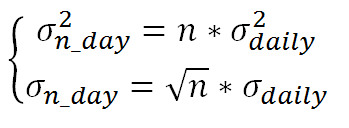

In order to convert a daily mean return to an n-day
mean return, we have the following formula:

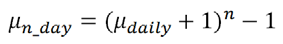

Based on daily returns, we have the following general formulas for VaR with a confidence level to estimate an n-day VaR:
 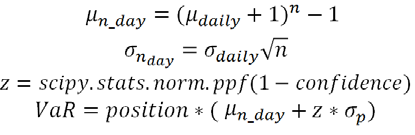



**Example**

The VaR for holding 50 shares of WalMart stocks, on the last day of 2016, over a 10-day period with a confidence level of 99%:


In [ ]:
ticker='WMT' # input 1
n_shares=50
confidence_level=0.99 #  for z calculation
n_days=10
begdate= '2012-01-1'
enddate= '2016-12-31'
z= stats.norm.ppf(1-confidence_level)

xWMT = yf.download(ticker,begdate,enddate)['Adj Close'] #   closing prices
retWMT =  (xWMT.diff()/xWMT.shift(1))[1::]
print("Latest value = ",xWMT[-1])
position=n_shares*xWMT[0]
VaR=position*z*np.std(retWMT)*np.sqrt(n_days)
print("Holding=",position, "VaR=", round(VaR,4), "in ", n_days,"Days")


[*********************100%***********************]  1 of 1 completed
Latest value =  61.991172790527344
Holding= 3099.558639526367 VaR= -239.783 in  10 Days


Another way to calculate an n-day VaR is to calculate a 10-day return directly.After 10-day returns
available, we could calculate the mean and standard deviation on the 10-day returns.


In [ ]:
import pandas as pd

In [ ]:
# method 2: calculate 10 day returns
n_days=10
dindex=[]

for i in range(0,np.size(ret)):
  dindex.append(int(i/n_days)) ## Create a group number (0 for the first 10 values, 1 for the next ten and so on)

y=pd.DataFrame(retWMT.to_numpy(),dindex , columns=['retNdays']) #Create a DataFrame with the group number as an index for grouping
print(y[0:10])
print("")
retNdaysWMT=y['retNdays'].groupby(y.index).sum() #sum the ret in a group of 10 based on
print(retNdays[0])
position=n_shares*xWMT[-1]
VaR=position*z*np.std(retNdaysWMT)

print("\nHolding=",position, "VaR=", round(VaR,4), "in ", n_days, "Days")

   retNdays
0 -0.010277
0 -0.004857
0 -0.007068
0  0.003051
0 -0.002366
0  0.006098
0  0.001683
0  0.000672
0  0.005207
0  0.002673

-0.005183555333965138

Holding= 3099.558639526367 VaR= -243.5171 in  10 Days


**Exercise 1**

What is the VaR for holding 100 shares of WalMart stocks, on the last day of 2017, over a 5-day period with a confidence level of 95%:



In [ ]:
##Write your code here


#Normality tests
* The first method to estimate VaR is based on a vital assumption that individual
stock or portfolio returns follow a normal distribution.
* We need to test whether the returns satisfy this
assumption.


The following program tests whether Microsoft follow a normal
distribution by using 5-year daily data


In [ ]:
ticker='MSFT'
begdate= '2012-01-01'
enddate= '2016-12-31'

dataMS = yf.download(ticker,begdate,enddate)['Adj Close']
retMS =  (dataMS.diff()/dataMS.shift(1))[1::]# calculate returns = (r_t - r_t-1)/r_t-1
print('ticker=',ticker)
print('W-test and P-value')
print(stats.shapiro(retMS ))
print( stats.anderson(retMS )) # default dist='norm'


[*********************100%***********************]  1 of 1 completed
ticker= MSFT
W-test and P-value
ShapiroResult(statistic=0.916563868522644, pvalue=9.451053461886889e-26)
AndersonResult(statistic=14.728541466742627, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


Based on the preceding result, the null hypothesis is rejected since the
F-value = 14.7285  is much higher than the critical value of 1.089 if we choose a 1% significance level (or the critical value of 0.915 if we choose a 2.5% significance level)

**Exercise 2**


Test whether
S&P500 daily returns follow a normal distribution. The ticker symbol for S&P500
from Yahoo!Finance is ^GSPC. Use the same beginning and end date as in the previous example.

In [ ]:
## Enter your code here


##Skewness and kurtosis

* Based on the normality assumption, a VaR estimation considers only the first two
moments: mean and variance. If stock returns truly follow a normal distribution,
those two moments would fully define their probability distribution.
* From the
preceding sections, we know that this is not true. The first remedy is to include other
higher moments in addition to the first two moments. The third and fourth moments
are called skewness and kurtosis.

For a stock or portfolio with n returns, **skewness** is
estimated by the following formula:

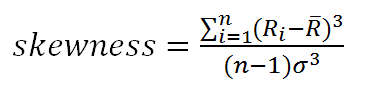

Here, $R_i$ is the ith return, is the mean return, $n$ is the
number of returns, and $σ$ is the standard deviation of returns.

The **kurtosis** reflects
the impact of extreme values because a power of 4 is very high. The kurtosis is
usually estimated by the following formula is:

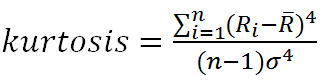

We can use *stats.skew()* and *stats.kurtosis()* to calculate the skewness and kurtosis respectively.

In [ ]:
from scipy import random
np.random.seed(12345) # to get the same distribution everytime we run this code
n=5000000
#
retRnd = random.normal(0,1,n) #Simulate n returns from a standard normal distribution
print('mean =', np.mean(retRnd))
print('std =',np.std(retRnd))
print('skewness=',stats.skew(retRnd))
print('kurtosis=',stats.kurtosis(retRnd))

mean = 0.00035852273706422504
std = 0.9998343506393362
skewness= -0.00040545999711941665
kurtosis= -0.001162270913658947


**Exercise 3**

Estimate the kewness and kurtosis for Microsoft's stock returns using 5-year daily data as in the example. What is your conclusion?



In [ ]:
## Write your code here


#Modified VaR

* From the previous discussion, we know that based on the assumption, that stock
returns follow a normal distribution. Because of this, the skewness and kurtosis
of returns are both assumed to be zero.
* However, in the real world, skewness and
excess kurtosis of many stock returns are not zero. As a consequence, the modified
VaR was developed to utilize those four moments instead of just two.
* See the following definition to calcualte a modified VaR

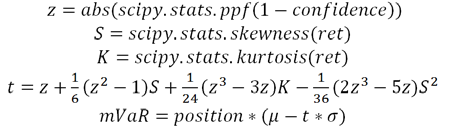



The following program offers two VaRs based
on the normality assumption and based on the preceding formula, that is, using all
four moments. The number of shares is 500 at the end of year 2016. The stock tested
is Walmart (WMT). The confidence level is 99% for a 1-day VaR:

In [ ]:
ticker='WMT'
n_shares=500
confidence_level=0.99
begdate= '2000-01-01'
enddate= '2016-12-31'

## Method 1: based on the first two moments (VaR)
z= abs(stats.norm.ppf(1-confidence_level) )
xWMT=yf.download(ticker,begdate,enddate)['Adj Close']
retWMT = (xWMT.diff()/xWMT.shift(1))[1::]
position=n_shares*xWMT[-1]
mean=np.mean(retWMT)
std=np.std(retWMT)
VaR=position*(mean-z*std)
print("Holding=",round(position,2), "VaR=", round(VaR,2), "for 1 day")

## Method 2:
# Modified VaR: based on 4 moments
k=stats.kurtosis(retWMT)
s=stats.skew(ret)
t1 =  (1/6.)*(z**2-1)*s
t2 =  (1/24.)*(z**3-3*z)*k
t3 =  (1/36.)*(2*z**3-5*z)*s**2
t=z+t1+t2-t3

mVaR=position*(mean-t*std)
print("Holding=",round(position,2), "Modified VaR=", round(mVaR,2),"for 1 day ")

[*********************100%***********************]  1 of 1 completed
Holding= 30995.59 VaR= -1093.53 for 1 day
Holding= 30995.59 Modified VaR= -1871.21 for 1 day 


Based on the last two lines, we have a VaR of \$1093.53 based on the normality and
the modified VaR has a value of \$1,871.2. The percentage difference of those two is 42%. This result suggests that ignoring the skewness and kurtosis would understate
VaR enormously.

#VaR based on sorted historical returns

* We know that stock returns do not necessarily follow a normal distribution.
* An
alternative is to use sorted returns to evaluate a VaR. This method is called VaR
based on historical returns.  

For a given confidence level, the one-period VaR is given here:

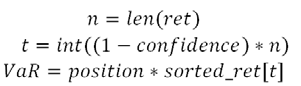

Where
* *ret* is a daily return vector and *sorted_ret* is a sorted return vector.
* $t$ is the position of the return we use to estimare VaR.

First, let's look at several ways to sort our
data. The first one uses the numpy.sort() function:


In [ ]:
a = np.array([1,-4,3])
b=np.sort(a) #sorted a

print("a=",a)
print("b=",b)

a= [ 1 -4  3]
b= [-4  1  3]


**1-Day VaR**

For owning 500 shares of Walmart, what is the maximum
loss with a 99% confidence level the next day?

method 1: Parametric VaR

In [ ]:
# Method 1: based on normality
ticker='IBM' #
n_shares=1000 #number of shares we have
confidence_level=0.99 #  for z calculation

begdate= '2012-02-07'
enddate= '2017-02-07'
z= stats.norm.ppf(1-confidence_level)

xIBM = yf.download('IBM',begdate,enddate)['Adj Close'] #  adj closing prices
print("Latest value = ",xIBM[-1])
retIBM = (xIBM.diff()/xIBM.shift(1))[1::] # calculate returns = (r_t - r_t-1)/r_t-1
position=n_shares*xIBM[-1] # calculate position, the current market value of our portfolio
std=np.std(retIBM) # standard deviation based on 5-year historical data
VaR=position*z*std # VaR
print("Holding=",position, "1-Day VaR=", round(VaR,4), "tomorrow")

[*********************100%***********************]  1 of 1 completed
Latest value =  128.87197875976562
Holding= 128871.97875976562 1-Day VaR= -3519.1623 tomorrow


method 2: sorting data VaR

In [ ]:
#The VaR for the same stock based on sorting
print(retIBM) #Before sorting
retIBM2=np.sort(retIBM)
print(retIBM2) #After sorting
position=n_shares*xIBM[-1] # calculate position, the current market value of our portfolio

n=np.size(retIBM2)
print("n=",n)
t=int((1-confidence_level)*n)
print("Left tail = ", t)
print("Sorted value at the left tail = ", retIBM2[t-1])
VaR2=position*retIBM2[t]

print("Holding=",position, "Sorted 1-Day VaR=", round(VaR2,4), "tomorrow")

Date
2012-02-08    0.001817
2012-02-09    0.000933
2012-02-10   -0.003677
2012-02-13    0.001040
2012-02-14   -0.002077
                ...   
2017-01-31   -0.007281
2017-02-01   -0.001318
2017-02-02    0.001664
2017-02-03    0.007103
2017-02-06    0.000228
Name: Adj Close, Length: 1257, dtype: float64
[-0.08279028 -0.07113428 -0.0637283  ...  0.0407207   0.04406351
  0.05035685]
n= 1257
Left tail =  12
Sorted value at the left tail =  -0.035285879912547474
Holding= 128871.97875976562 Sorted 1-Day VaR= -4547.3612 tomorrow


**n-Day VaR**


The following codes are for an n-day period based on normality vs sorting:


In [ ]:
# Method 1: based on normality and 10-day return.
ticker='WMT' # input 1
n_shares=50
confidence_level=0.99 #  for z calculation
n_days=10
begdate= '2012-01-1'
enddate= '2016-12-31'
z= stats.norm.ppf(1-confidence_level)

xWMT = yf.download(ticker,begdate,enddate)['Adj Close'] #  adj  closing prices
retWMT =  (xWMT.diff()/xWMT.shift(1))[1::]

dindex=[]

for i in range(0,np.size(retWMT)):
  dindex.append(int(i/n_days)) ## Create a group number (0 for the first 10 values, 1 for the next ten and so on)

y=pd.DataFrame(retWMT.to_numpy(),dindex , columns=['retNdays'])
retNdaysWMT=y['retNdays'].groupby(y.index).sum() #sum the ret in a group of 10 based on

position=n_shares*xWMT[-1]
VaR=position*z*np.std(retNdaysWMT)

print("Holding=",position, "VaR=", round(VaR,4), "in ", n_days, "Days")


[*********************100%***********************]  1 of 1 completed
Holding= 3099.559211730957 VaR= -243.5171 in  10 Days


In [ ]:
#The 10-Day VaR for the same stock based on sorting
retWMT2 = np.sort(retNdaysWMT)
position = n_shares*xWMT[-1]

n=np.size(retWMT2)
print(n)
t=int((1-confidence_level)*n)
print("Left tail = ", t)
print("Sorted value at the left tail = ", retWMT2[t])
VaR2=position*retWMT2[t]
print("Holding=",position, "VaR=", round(VaR2,0), "in ",n_days, "Days")

126
Left tail =  1
Sorted value at the left tail =  -0.10255377983570242
Holding= 3099.559211730957 VaR= -318.0 in  10 Days


#Simulation and VaR
* There are two ways to estimate VaR for
an individual stock or for a portfolio. The first method depends on the assumption
that stock returns follow a normal distribution. The second one uses the sorted
historical returns.
*  What is the link between those two methods? Actually, Monte
Carlo simulation could be served as a link.  Here is how it works:
  1. First, we calculate the mean and standard deviation based on daily returns.
  2. Since stock returns are assumed to follow a normal distribution, we could generate 5,000 returns with the same mean and standard deviation.
  3. We use the simuated returns to estimate VaR based on sorting.

**Example**

We have 500 Walmart shares on the last day of 2016. What is the VaR tomorrow if the confidence level is 99%?

In [ ]:
## First, calculate the mean and standard deviation based on daily returns.
ticker='WMT'
n_shares=500
confidence_level=0.99
begdate= '2000-01-01'
enddate= '2016-12-31'

xWMT=yf.download(ticker,begdate,enddate)['Adj Close']
retWMT = (xWMT.diff()/xWMT.shift(1))[1::]
print(np.size(retWMT))
z= stats.norm.ppf(1-confidence_level)
position=n_shares*xWMT[-1]
mean=np.mean(retWMT)
std=np.std(retWMT)
VaR=position*(mean+z*std)
print("Holding=",position, "VaR=", round(VaR,4), "tomorrow")


[*********************100%***********************]  1 of 1 completed
4276
Holding= 30995.58448791504 VaR= -1093.5311 tomorrow


In [ ]:
#Next, generate 5,000 returns with the same mean and standard deviation.
n_simulation=5000
np.random.seed(1234567) #To ensure we get the same distribution everytime we run this script
ret2=np.random.normal(mean,std,n_simulation)

# Sort the simulated returns and calculate VaR
ret3=np.sort(ret2)
m=int(n_simulation*(1-confidence_level))
#print("Position = ", m)
VaR=position*(ret3[m])
print("Holding=",position, "VaR=", round(VaR,4), "tomorrow")

Holding= 30995.58448791504 VaR= -1125.3716 tomorrow


In [ ]:
#The 1-Day VaR for the same stock based on actual sorting
ret4 = np.sort(retWMT)
position4 = n_shares*xWMT[-1]

n=np.size(ret4)
t=int((1-confidence_level)*n)
print("Left tail = ", t)
print("Sorted value at the left tail = ", ret4[t])
VaR2=position4*ret2[t]
print("Holding=",position, "VaR=", round(VaR2,0), "in ",n_days, "Days")

Left tail =  42
Sorted value at the left tail =  -0.0406848972880154
Holding= 30995.58448791504 VaR= -891.0 in  10 Days


#VaR for portfolios

* When putting many stocks in our portfolio, we could reduce or eliminate firm-specific risk.
* The formula to estimate an n-stock portfolio return is given here:

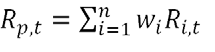

Here Rp,t is the portfolio return at time t, wi is the weight for stock i, and Ri, t is the
return at time t for stock

When talking about the expected return or mean, we have a quite similar formula:

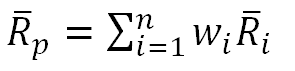

Here, $\overline{R}_p$ is the mean or expected portfolio return, $\overline{R}_i$ is the mean or expected
return for stock i.


The variance of such an n-stock portfolio is given here:

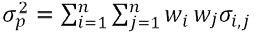

In [ ]:
# Step 1: input area
tickers=('IBM','WMT','C') # tickers
begdate= '2000-01-01' # beginning date
enddate= '2016-12-31' # ending date
weight=[0.2,0.5,0.3] # weights
confidence_level=0.99 # confidence level
position=5e6 # total value of our portfolio

z=stats.norm.ppf(confidence_level)

# Step 2: define a function to calculate returns
def ret_f(ticker,begdate,enddte):
  x = yf.download(ticker,begdate,enddate)['Adj Close']
  ret = (x.diff()/x.shift(1))[1::]
  d0 = x.index[1:]
  return pd.DataFrame(ret.to_numpy(),index=d0,columns=[ticker])

# Step 3: Merge returns from all stocks
n=np.size(tickers)
final=ret_f(tickers[0],begdate,enddate) # Start with the first stock
for i in np.arange(1,n): #Merge the rest
  a=ret_f(tickers[i],begdate,enddate)
  final=pd.merge(final,a,left_index=True,right_index=True) #same date
#print(final.head())

# Step 4: get porfolio returns
portRet= np.dot(final,weight) # weighted daily returns for the portfolio
portStd=np.std(portRet)
portMean=np.mean(portRet)
VaR=position*(portMean-z*portStd)
print("Holding=",position, "VaR=", round(VaR,2), "tomorrow")

# Compare with the summation of the VaR for those three stocks
totalVaR = 0

for i in np.arange(n):
  stock=tickers[i]
  ret=final[stock]
  positionS=position*weight[i]
  mean=np.mean(ret)
  std=np.std(ret)
  VaR=positionS*(mean-z*std)
  totalVaR+=VaR
  print("For ", stock, "with a value of ", positionS, "VaR=",round(VaR,2))
print("Sum of three VaR=",round(totalVaR,2))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Holding= 5000000.0 VaR= -182728.75 tomorrow
For  IBM with a value of  1000000.0 VaR= -38333.62
For  WMT with a value of  2500000.0 VaR= -88200.52
For  C with a value of  1500000.0 VaR= -112929.22
Sum of three VaR= -239463.35


The VaR for our current portfolio of $5 million is \$182,728.75. However, the summation
of the VaR for those three stocks based on our weights is \$239,463.35. This result verifies
the diversification effect by choosing different stocks.

#Expected shortfall

* One major concern with VaR is that
it depends on the shape of the distribution of the underlying security or portfolio. If the assumption of normality is close to hold, then VaR is a reasonable measure. Otherwise, we might underestimate the maximum loss (risk) if we observe a fat tail.
* Another concern is that the shape of the distribution after a VaR is hit is ignored. If we have a fatter left tail than a normal distribution describes, then our VaR would underestimate the true risk.  The opposite is true: if the left tail is thinner than the normal distribution, our VaR would overestimate the true risk.
* Expected shortfall (ES) is a risk measure sensitive to the shape of the tail of the distribution.  The expected shortfall (with the normal distribution assumption) could be estimated in the following way:

image.png

where

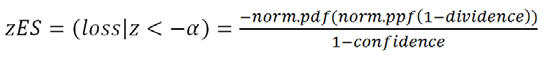




The following program shows how to estimates both the VaR and ES on returns simulated from a normal distribution.

In [ ]:
x = np.arange(-3,3,0.01)
ret=stats.norm.pdf(x) #Simulate returns
confidence=0.99
position=10000 #the value of our portfolio
z=stats.norm.ppf(1-confidence) #for the nominator of zES
print("z=",z)
zES=-stats.norm.pdf(z)/(1-confidence)
print("zES=", zES)
std=np.std(ret)
VaR=position*z*std
print("VaR=",VaR)
ES=position*zES*std
print("ES=",ES)


z= -2.3263478740408408
zES= -2.665214220345806
VaR= -3239.123475273761
ES= -3710.948841352863


**The expected shortfall based on historical returns**

The expected shortfall is the average loss based on
returns with a lower value than the VaR threshold. Assume that we have n return
observations. The expected shortfall could be defined as follows:

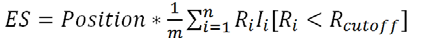

Where
* $m$ is the
number of observations which are worse than our cut-off point specified by the given confidence level
* $l_i$ is a dummy variable which takes a value of 1 for returns less than $R_{cutoff}$ and zero otherwise
* $R_i$ is the ith return
* $R_{cutoff}$ is the cutoff return


**Example**

Assume that on the last day of 2016, we own 500 shares of Walmart stocks. Assume
that we care about the next day's maximum loss with a confidence level of 99%.
Based on the ranking of historical returns, what is the VaR and the expected
shortfall? The following code offers an answer:

In [ ]:
ticker='WMT' # input 1
begdate= '2012-01-1'
enddate= '2016-12-31'
n_shares = 500
confidence_level = 0.99
xclose = yf.download(ticker,begdate,enddate)['Adj Close'] #
ret =  (xclose.diff()/xclose.shift(1))[1::]
ret2=np.sort(ret)

position=n_shares*xclose[-1]
n=np.size(ret2)
m=int(n*(1-confidence_level))
print("m=",m)

sum=0.0
for i in np.arange(m):
  sum+=ret2[i] ## include only the first m returns (in ascending order) where R_i < R_cutoff

ret3=sum/m
ES=position*ret3
print("Holding=",position, "Expected Shortfall=", round(ES,4),"tomorrow")

[*********************100%***********************]  1 of 1 completed
m= 12
Holding= 30995.590209960938 Expected Shortfall= -1292.4906 tomorrow
